# Predict the fare amount of future rides using regression analysis¶

In [1]:
#Importing libraries and warnings

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing dataset

uber=pd.read_csv('/Users/NAGESH/OneDrive/Desktop/Upgrad Python/uber.csv')

In [3]:
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
#How many rows and columns does the dataset contain
uber.shape

(200000, 9)

In [5]:
#getting type and information of the columns
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
#Checking Missing and Null values
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

# EXPLORATORY DATA ANALYSIS
#Handling Missing Data

In [8]:
#Dropping first and second columns since keys and id are not useful for prediction.
uber_1=uber.drop(['Unnamed: 0','key'],axis=1)

In [9]:
uber_1.shape

(200000, 7)

In [10]:
uber_1.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
#Drop null rows
uber_1.dropna(axis=0,inplace=True)
uber_1.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
uber_1.shape

(199999, 7)

In [13]:
uber_1.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
uber_1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Harvesine formula


Calculatin the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy.

In [15]:
#Harvesine formula is to find the distance of the Uber ride 

def haversine (lon_1, lon_2, lat_1, lat_2):

    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians


    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1

    #  r=6371.0  earth radius in km
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))

    return km

In [16]:
#Finding distance per ride

uber_1['Distance']= haversine(uber_1['pickup_longitude'],uber_1['dropoff_longitude'],
                             uber_1['pickup_latitude'],uber_1['dropoff_latitude'])
uber_1.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [17]:
#Rounding distance into two deciaml points

uber_1['Distance'] = uber_1['Distance'].astype(float).round(2)

In [18]:
uber_1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


# Scatter Plot

#scatter plot is a type of graph that shows the relationship between two sets of data. It uses dots to represent each data point, with one set of data shown on the horizontal axis and the other set of data shown on the vertical axis.
we take Distance and Fare amount

Text(0.5, 1.0, 'fare_amount vs Distance')

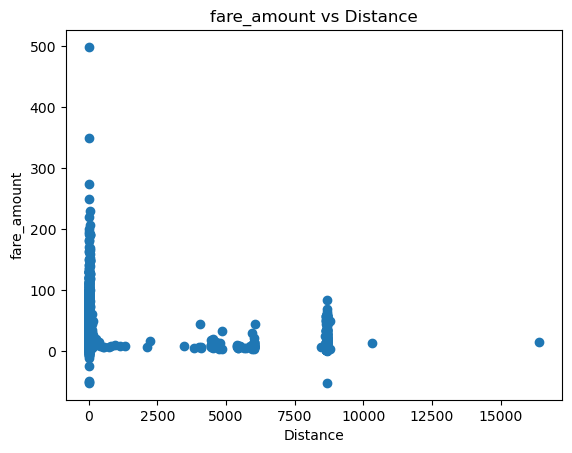

In [19]:
plt.scatter(uber_1['Distance'], uber_1['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")
plt.title("fare_amount vs Distance")

#The above graph is not in linear regression hence we are finding outliers

# OUTLIERS

In [20]:
#We can get rid of the trips with very large distances that are outliers as well as trips with 0 distance.

In [21]:
uber_1.drop(uber_1[uber_1['Distance'] > 60].index, inplace = True)
uber_1.drop(uber_1[uber_1['Distance'] == 0].index, inplace = True)
uber_1.drop(uber_1[uber_1['Distance'] < 0].index, inplace = True)

uber_1.drop(uber_1[uber_1['fare_amount'] == 0].index, inplace = True)
uber_1.drop(uber_1[uber_1['fare_amount'] < 0].index, inplace = True)

Text(0, 0.5, 'fare_amount')

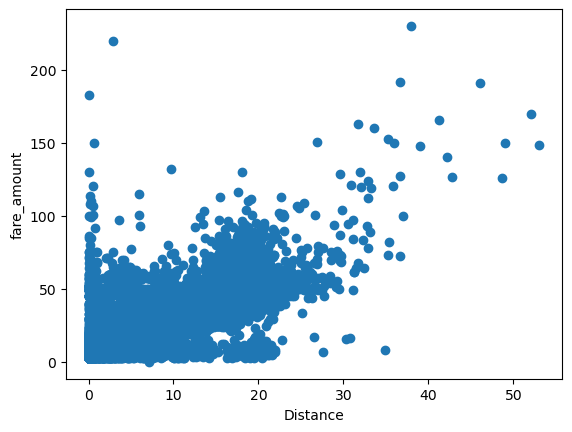

In [22]:
plt.scatter(uber_1['Distance'], uber_1['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [23]:
uber_1.shape

(193490, 8)

In [24]:
uber_2=uber_1.drop(uber_1[uber_1['Distance'] <1].index)

In [25]:
uber_2.shape

(163894, 8)

In [26]:
uber_1.drop(uber_1[uber_1['fare_amount'] > 100].index, inplace = True)

In [27]:
uber_1.shape

(193436, 8)

In [28]:
uber_1.drop(uber_1[ (uber_1['Distance']<1)].index, inplace = True )

In [29]:
uber_1.shape

(163849, 8)

In [30]:
uber_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163849 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        163849 non-null  float64
 1   pickup_datetime    163849 non-null  object 
 2   pickup_longitude   163849 non-null  float64
 3   pickup_latitude    163849 non-null  float64
 4   dropoff_longitude  163849 non-null  float64
 5   dropoff_latitude   163849 non-null  float64
 6   passenger_count    163849 non-null  int64  
 7   Distance           163849 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 11.3+ MB


Text(0, 0.5, 'fare_amount')

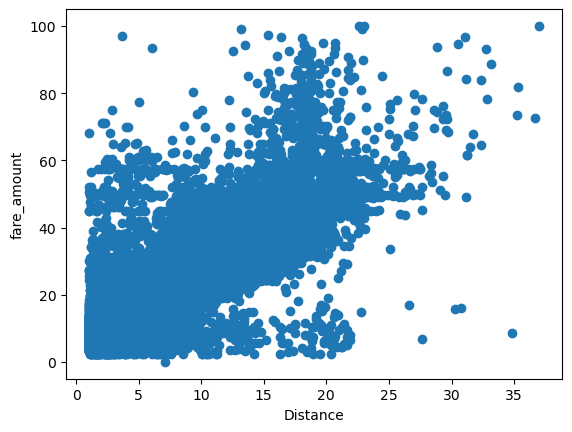

In [31]:
plt.scatter(uber_1['Distance'], uber_1['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [32]:
uber_1.shape

(163849, 8)

# Date and Time

In [33]:
#Separating the date and time into separate columns for more usability.

In [34]:
import datetime
uber_1['pickup_datetime'] = pd.to_datetime(uber_1['pickup_datetime'])

In [35]:
uber_1['Year'] = uber_1['pickup_datetime'].apply(lambda time: time.year)
uber_1['Month'] = uber_1['pickup_datetime'].apply(lambda time: time.month)
uber_1['Day'] = uber_1['pickup_datetime'].apply(lambda time: time.day)
uber_1['Day_of_Week'] = uber_1['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_1['Day_of_Week_num'] = uber_1['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_1['Hour'] = uber_1['pickup_datetime'].apply(lambda time: time.hour)
uber_1['counter'] = 1

In [36]:
uber_1.shape

(163849, 15)

In [37]:
uber_1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day_of_Week,Day_of_Week_num,Hour,counter
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,7,3,3,19,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,17,4,4,20,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009,8,24,0,0,21,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,26,4,4,8,1
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,28,3,3,17,1


# Data Visualizations
#Finding the trends in the data variables

In [38]:
years=uber['Year'].value_counts()
years.plot(kind='bar',figsize=(5,5))
plt.xlabel('years')
plt.ylabel('count')
plt.title('Number of trips vs years')

KeyError: 'Year'

In [ ]:
hour=uber['Hour'].value_counts()
hour.plot(kind='bar',figsize=(5,5))
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Number of trips vs hours')

In [ ]:
month=uber['Month'].value_counts()
month.plot(kind='bar',figsize=(5,5))
plt.xlabel('month')
plt.ylabel('count')
plt.title('Number of trips vs months')

In [ ]:
DayWeek=uber['Day_of_Week'].value_counts()
DayWeek.plot(kind='bar',figsize=(5,5))
plt.xlabel('Day of Week')
plt.ylabel('count')
plt.title('Number of trips vs weekdays')

In [ ]:
#Rides vs Time
#Relation between average number of rides over a period of time.

In [ ]:
year_vs_trips = uber_1.groupby(['Year','Month']).agg(
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Avg_distance = ( 'Distance', 'mean'))

In [ ]:
year_vs_trips.head()

In [ ]:
year_vs_trips = uber_1.groupby(['Year','Month']).agg(
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Avg_distance = ( 'Distance', 'mean')).reset_index()

year_vs_trips.head()

In [ ]:
year_vs_trips['avg_no_of_trips'] = (year_vs_trips['no_of_trips']/30).round(3)
year_vs_trips['month_year'] = " "+year_vs_trips['Month'].astype(str) +","+ year_vs_trips['Year'].astype(str)
year_vs_trips.head()


In [ ]:
year_vs_trips.plot(kind='line',x='month_year',y='no_of_trips', xlabel='January, 2009 - June, 2015',
    ylabel='No of Trips', title='No of trips vs Months')

In [ ]:
#Heat-Map
#A heat map is a visual tool that uses color to represent the magnitude of data values. It's often used to show patterns or relationships between different variables. A heat map to illustrate at what time of day and week, people are using Uber the most.

In [ ]:
import seaborn as sns

df_1 = uber_1[['Distance', 'Day_of_Week_num', 'Hour']].copy()

df_1.head(100)

In [ ]:
df_h = df_1.copy()

df_h= df_h.groupby(['Hour', 'Day_of_Week_num']).mean()
df_h = df_h.unstack(level=0)

In [ ]:
df_h

In [ ]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.heatmap(df_h, cmap="Reds",
           linewidth=.3, cbar_kws={"shrink": .8})

xticks_labels = ['12 AM', '01 AM', '02 AM ', '03 AM ', '04 AM ', '05 AM ', '06 AM ', '07 AM ',
                 '08 AM ', '09 AM ', '10 AM ', '11 AM ', '12 PM ', '01 PM ', '02 PM ', '03 PM ',
                 '04 PM ', '05 PM ', '06 PM ', '07 PM ', '08 PM ', '09 PM ', '10 PM ', '11 PM ']

yticks_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(np.arange(24) +.5 , labels=xticks_labels)
plt.yticks(np.arange(7) +.5 , labels=yticks_labels)

ax.xaxis.tick_top()

title = 'Weekly Uber Rides'.upper()
plt.title(title, fontdict={'fontsize': 30})

plt.show()

In [ ]:
import statistics as st

print("Mean of fare prices is % s "
         % (st.mean(uber_2['fare_amount'])))

print("Median of fare prices is % s "
         % (st.median(uber_2['fare_amount'])))

print("Standard Deviation of Fare Prices is % s "
                % (st.stdev(uber_2['fare_amount'])))

In [ ]:
import statistics as st

print("Mean of Distance is % s "
         % (st.mean(uber_2['Distance'])))

print("Median of Distance is % s "
         % (st.median(uber_2['Distance'])))

print("Standard Deviation of Distance is % s "
                % (st.stdev(uber_2['Distance'])))

# Coorelation Matrix
#A correlation matrix is a tool used to analyze the relationships between variables in a dataset.

#To find the two variables that have the most inter-dependence

In [ ]:
# Identify non-numeric columns
non_numeric_cols = [col for col in uber_1.columns if not pd.api.types.is_numeric_dtype(uber_1[col])]

# Exclude non-numeric columns from correlation calculation
numeric_cols = uber_1.columns.difference(non_numeric_cols)
corr = uber_1[numeric_cols].corr()

# Display correlation matrix with background gradient
corr.style.background_gradient(cmap='BuGn')

# Standardization
For more accurate results on our linear regression model

# There is some coorelation between the distance and fare amount. So we will implement our simple linear regression model using these two varaibles.

Assigning the dependent and independent variable

In [ ]:
X = uber_1['Distance'].values.reshape(-1, 1)        #Independent Variable
y = uber_1['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

# Splitting the Dataset
#Training and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)